In [53]:
!pip install tensorflow==2.12

###Loading the important libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').disabled = True


###Importing TensorFlow and Keras:

In [55]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re, os

###Considering the IMDB example from Chapter 6. Re-running the example and modifying the by implementing a cutoff for reviews after 150 words, Validation Sample - 10000, Consider only the top 10,000 words
##Model 1: Basic model just using embedded layer with Training Sample - 100Creating the training sample with 100 obs , validation with 10,000 obs and test with 5000 obs

In [56]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

max_words = 10000
max_length = 150

(train_samples, train_targets), (test_samples, test_targets) = imdb.load_data(num_words=max_words)

train_samples = pad_sequences(train_samples, maxlen=max_length)
test_samples = pad_sequences(test_samples, maxlen=max_length)

all_samples = np.concatenate((train_samples, test_samples), axis=0)
all_targets = np.concatenate((train_targets, test_targets), axis=0)

train_samples_final, val_samples, train_targets_final, val_targets = train_test_split(
    all_samples, all_targets, train_size=100, test_size=10000, random_state=42, stratify=all_targets)

_, final_test_samples, _, final_test_targets = train_test_split(
    test_samples, test_targets, test_size=5000, random_state=42, stratify=test_targets)



In [13]:
train_samples_final.shape

(100, 150)

In [14]:
val_samples.shape

(10000, 150)

In [15]:
final_test_samples.shape

(5000, 150)

###Model Building :

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

custom_model = Sequential()

custom_model.add(Embedding(input_dim=10000, output_dim=8, input_length=max_length))

custom_model.add(Flatten())

custom_model.add(Dense(units=1, activation='sigmoid'))

custom_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

custom_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


###Model Execution

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath="custom_model.h5",
    save_best_only=True,
    monitor="val_loss"
)

training_history = custom_model.fit(
    train_samples_final, train_targets_final,
    epochs=30,
    batch_size=32,
    validation_data=(val_samples, val_targets),
    callbacks=[checkpoint_callback]
)


Epoch 1/30
4/4 [==============================] - 2s 316ms/step - loss: 0.6976 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 2/30
4/4 [==============================] - 1s 443ms/step - loss: 0.6755 - accuracy: 0.7400 - val_loss: 0.6932 - val_accuracy: 0.5017
Epoch 3/30
4/4 [==============================] - 0s 162ms/step - loss: 0.6601 - accuracy: 0.9200 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 4/30
4/4 [==============================] - 1s 225ms/step - loss: 0.6467 - accuracy: 0.9700 - val_loss: 0.6929 - val_accuracy: 0.5079
Epoch 5/30
4/4 [==============================] - 1s 178ms/step - loss: 0.6337 - accuracy: 0.9600 - val_loss: 0.6928 - val_accuracy: 0.5110
Epoch 6/30
4/4 [==============================] - 1s 167ms/step - loss: 0.6208 - accuracy: 0.9700 - val_loss: 0.6927 - val_accuracy: 0.5142
Epoch 7/30
4/4 [==============================] - 1s 220ms/step - loss: 0.6076 - accuracy: 0.9700 - val_loss: 0.6927 - val_accuracy: 0.5147
Epoch 8/30
4/4 [====

####Plotting the Accuracy and loss for training and validation

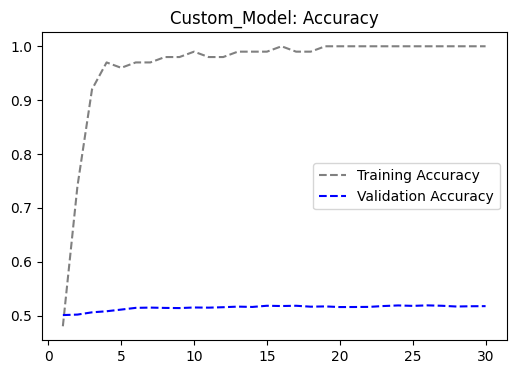

<Figure size 640x480 with 0 Axes>

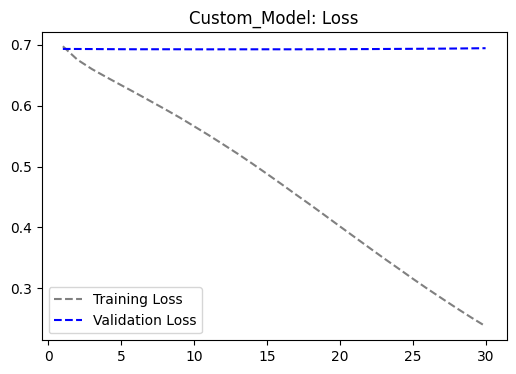

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']

train_loss = training_history.history["loss"]
val_loss = training_history.history["val_loss"]

epoch_range = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epoch_range, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Custom_Model: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, train_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epoch_range, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Custom_Model: Loss")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Loading the saved model
loaded_model = load_model('custom_model.h5')

# Evaluating the model on the test data
evaluation_results = loaded_model.evaluate(final_test_samples, final_test_targets)

# Printing the results (Loss and Accuracy)
print(f'Loss: {evaluation_results[0]:.3f}')
print(f'Accuracy: {evaluation_results[1]:.3f}')


157/157 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5080
Loss: 0.693
Accuracy: 0.508


####The model built with training sample of 100 and just one embedded layer gave the loss as 0.693 and accuracy of 0.512 that means the model has performed well for a training sample of 100. Now let us try building the model with the training sample of 5000.

##Model 2: Basic model just using embedded layer with Training Sample - 5,000

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

vocab_size = 10000
sequence_length = 150

((x_train, y_train), (x_test, y_test)) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=sequence_length)
x_test = pad_sequences(x_test, maxlen=sequence_length)

all_texts = np.concatenate((x_train, x_test), axis=0)
all_labels = np.concatenate((y_train, y_test), axis=0)

train_features, val_features, train_targets, val_targets = train_test_split(
    all_texts, all_labels, train_size=5000, test_size=10000, random_state=42, stratify=all_labels
)

_, final_test_features, _, final_test_targets = train_test_split(
    x_test, y_test, test_size=5000, random_state=42, stratify=y_test
)


In [ ]:
train_features.shape

(5000, 150)

In [ ]:
val_features.shape

(10000, 150)

In [ ]:
final_test_features.shape

(5000, 150)

###Model Building :

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

classifier = Sequential()
classifier.add(Embedding(input_dim=10000, output_dim=8, input_length=sequence_length))
classifier.add(Flatten())
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="best_model.h5",
    save_best_only=True,
    monitor="val_loss"
)

history = classifier.fit(
    train_features, train_targets,
    epochs=30,
    batch_size=32,
    validation_data=(val_features, val_targets),
    callbacks=[checkpoint]
)


Epoch 1/30
157/157 [==============================] - 2s 7ms/step - loss: 0.6896 - accuracy: 0.5480 - val_loss: 0.6804 - val_accuracy: 0.6317
Epoch 2/30
157/157 [==============================] - 2s 14ms/step - loss: 0.6347 - accuracy: 0.7642 - val_loss: 0.6064 - val_accuracy: 0.7535
Epoch 3/30
157/157 [==============================] - 1s 9ms/step - loss: 0.5108 - accuracy: 0.8376 - val_loss: 0.4973 - val_accuracy: 0.8018
Epoch 4/30
157/157 [==============================] - 1s 7ms/step - loss: 0.3851 - accuracy: 0.8834 - val_loss: 0.4220 - val_accuracy: 0.8276
Epoch 5/30
157/157 [==============================] - 1s 7ms/step - loss: 0.2972 - accuracy: 0.9116 - val_loss: 0.3834 - val_accuracy: 0.8371
Epoch 6/30
157/157 [==============================] - 1s 6ms/step - loss: 0.2367 - accuracy: 0.9334 - val_loss: 0.3702 - val_accuracy: 0.8379
Epoch 7/30
157/157 [==============================] - 1s 6ms/step - loss: 0.1930 - accuracy: 0.9428 - val_loss: 0.3562 - val_accuracy: 0.8458
Epoch

###Plotting the Accuracy and loss for training and validation

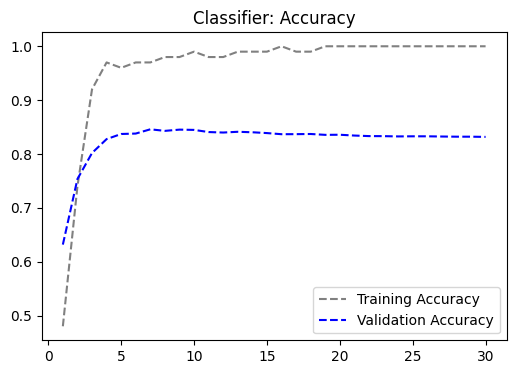

<Figure size 640x480 with 0 Axes>

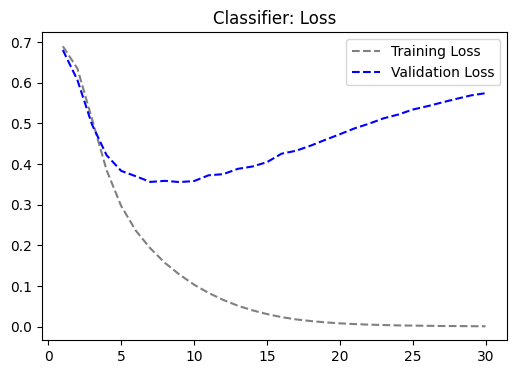

In [ ]:
import matplotlib.pyplot as plt

validation_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_range, validation_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Classifier: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_range, validation_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Classifier: Loss")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('best_model.h5')

evaluation_results = loaded_model.evaluate(final_test_features, final_test_targets)
print(f'Loss: {evaluation_results[0]:.3f}')
print(f'Accuracy: {evaluation_results[1]:.3f}')


157/157 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8660
Loss: 0.317
Accuracy: 0.866


##Model 3: Basic model just using embedded layer with Training Sample - 10,000

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

vocab_size = 10000
sequence_length = 150

((x_train, y_train), (x_test, y_test)) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=sequence_length)
x_test = pad_sequences(x_test, maxlen=sequence_length)

all_sequences = np.concatenate((x_train, x_test), axis=0)
all_labels = np.concatenate((y_train, y_test), axis=0)

train_sequences, validation_sequences, train_targets, validation_targets = train_test_split(
    all_sequences, all_labels, train_size=10000, test_size=10000, random_state=42, stratify=all_labels
)

_, final_test_sequences, _, final_test_targets = train_test_split(
    x_test, y_test, test_size=5000, random_state=42, stratify=y_test
)


In [ ]:
train_sequences.shape

(10000, 150)

In [ ]:
validation_sequences.shape

(10000, 150)

In [ ]:
final_test_sequences.shape

(5000, 150)

####Model Building :

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

sentiment_model = Sequential()
sentiment_model.add(Embedding(input_dim=10000, output_dim=8, input_length=sequence_length))
sentiment_model.add(Flatten())
sentiment_model.add(Dense(units=1, activation='sigmoid'))

sentiment_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

sentiment_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    filepath="best_sentiment_model.h5",
    save_best_only=True,
    monitor="val_loss"
)

training_history = sentiment_model.fit(
    train_sequences, train_targets,
    epochs=30,
    batch_size=32,
    validation_data=(validation_sequences, validation_targets),
    callbacks=[model_checkpoint]
)


Epoch 1/30
313/313 [==============================] - 2s 5ms/step - loss: 0.6741 - accuracy: 0.6071 - val_loss: 0.6213 - val_accuracy: 0.7125
Epoch 2/30
313/313 [==============================] - 1s 4ms/step - loss: 0.4962 - accuracy: 0.8110 - val_loss: 0.4276 - val_accuracy: 0.8323
Epoch 3/30
313/313 [==============================] - 1s 5ms/step - loss: 0.3393 - accuracy: 0.8743 - val_loss: 0.3594 - val_accuracy: 0.8468
Epoch 4/30
313/313 [==============================] - 2s 5ms/step - loss: 0.2662 - accuracy: 0.9007 - val_loss: 0.3371 - val_accuracy: 0.8533
Epoch 5/30
313/313 [==============================] - 1s 5ms/step - loss: 0.2209 - accuracy: 0.9198 - val_loss: 0.3173 - val_accuracy: 0.8662
Epoch 6/30
313/313 [==============================] - 1s 5ms/step - loss: 0.1862 - accuracy: 0.9365 - val_loss: 0.3214 - val_accuracy: 0.8600
Epoch 7/30
313/313 [==============================] - 3s 9ms/step - loss: 0.1580 - accuracy: 0.9486 - val_loss: 0.3160 - val_accuracy: 0.8672
Epoch 

###Plotting the Accuracy and loss for training and validation

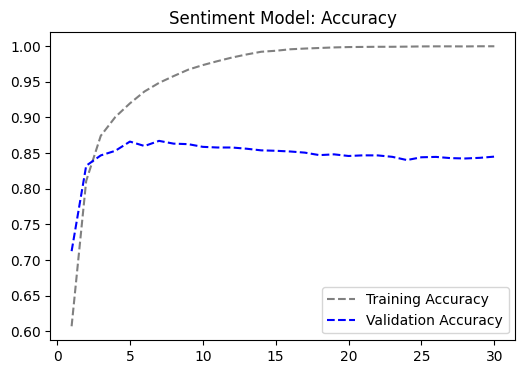

<Figure size 640x480 with 0 Axes>

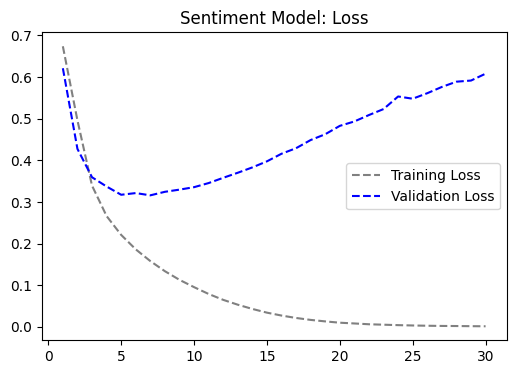

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = training_history.history['accuracy']
validation_accuracy = training_history.history['val_accuracy']

train_loss = training_history.history["loss"]
validation_loss = training_history.history["val_loss"]

epochs_range = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_range, validation_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Sentiment Model: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_range, validation_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Sentiment Model: Loss")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

final_model = load_model('best_sentiment_model.h5')

evaluation_results = final_model.evaluate(final_test_sequences, final_test_targets)
print(f'Loss: {evaluation_results[0]:.3f}')
print(f'Accuracy: {evaluation_results[1]:.3f}')


157/157 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.8762
Loss: 0.282
Accuracy: 0.876


####The model's performance improves as the training sample size increases. Larger datasets allow the model to generalize better, leading to higher accuracy and lower loss. While 5000 samples show a significant improvement over just 100 samples, the best results are achieved with 10000 samples. For optimal performance, a larger dataset is highly beneficial.

##Model 4: Using convolution 1D and Embedding layer together with training sample size as 10,000

####Using Convolution 1D to see how this combination will impact the accuracy of the model with same training sample size (10,000) .To mitigate overfitting, we incorporated MaxPooling and Dropout layers. MaxPooling is employed to down-sample the spatial dimensions of the input, focusing on the most salient features, thereby aiding in feature extraction and reducing the risk of overfitting by selecting the most prominent information from the convolved feature.

###Model Building :

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, GlobalMaxPooling1D, Dense
from tensorflow.keras import optimizers

text_model = Sequential()

input_length = 150
text_model.add(Embedding(input_dim=10000, output_dim=8, input_length=input_length))

text_model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
text_model.add(MaxPooling1D(pool_size=3))

text_model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
text_model.add(MaxPooling1D(pool_size=3))

text_model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
text_model.add(Dropout(0.8))
text_model.add(MaxPooling1D(pool_size=3))

text_model.add(GlobalMaxPooling1D())

text_model.add(Dense(256, activation='relu'))
text_model.add(Dense(1, activation='sigmoid'))

adam_optimizer = optimizers.Adam(learning_rate=0.0001)
text_model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

text_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 conv1d (Conv1D)             (None, 148, 512)          12800     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 256)          

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath="best_text_model.h5",
    save_best_only=True,
    monitor="val_loss"
)

training_history_4 = text_model.fit(
    train_sequences, train_targets,
    epochs=30,
    batch_size=32,
    validation_data=(validation_sequences, validation_targets),
    callbacks=[checkpoint_callback]
)


Epoch 1/30
313/313 [==============================] - 72s 226ms/step - loss: 0.6928 - accuracy: 0.5143 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/30
313/313 [==============================] - 72s 232ms/step - loss: 0.6208 - accuracy: 0.6300 - val_loss: 0.5904 - val_accuracy: 0.7606
Epoch 3/30
313/313 [==============================] - 79s 252ms/step - loss: 0.4085 - accuracy: 0.8156 - val_loss: 0.5375 - val_accuracy: 0.7897
Epoch 4/30
313/313 [==============================] - 70s 223ms/step - loss: 0.3284 - accuracy: 0.8647 - val_loss: 0.5064 - val_accuracy: 0.8076
Epoch 5/30
313/313 [==============================] - 70s 224ms/step - loss: 0.2739 - accuracy: 0.8946 - val_loss: 0.4836 - val_accuracy: 0.8076
Epoch 6/30
313/313 [==============================] - 70s 223ms/step - loss: 0.2199 - accuracy: 0.9162 - val_loss: 0.4614 - val_accuracy: 0.8076
Epoch 7/30
313/313 [==============================] - 70s 223ms/step - loss: 0.1801 - accuracy: 0.9297 - val_loss: 0.4498 - val_ac

####Plotting the Accuracy and loss for training and validation

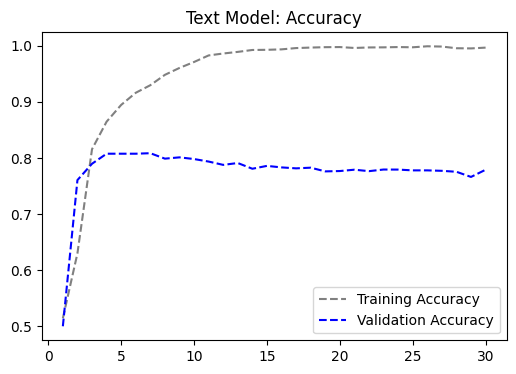

<Figure size 640x480 with 0 Axes>

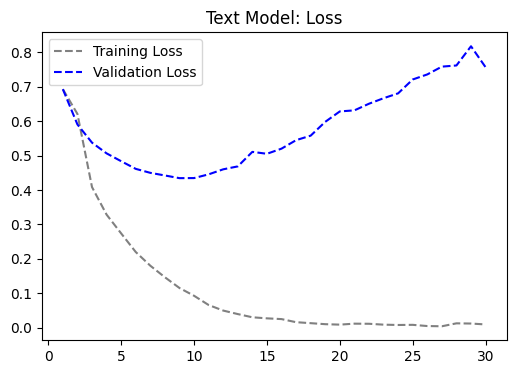

In [ ]:
import matplotlib.pyplot as plt

train_accuracy_4 = training_history_4.history['accuracy']
val_accuracy_4 = training_history_4.history['val_accuracy']

train_loss_4 = training_history_4.history["loss"]
val_loss_4 = training_history_4.history["val_loss"]

epochs_range_4 = range(1, len(train_accuracy_4) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs_range_4, train_accuracy_4, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_range_4, val_accuracy_4, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Text Model: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epochs_range_4, train_loss_4, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_range_4, val_loss_4, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Text Model: Loss")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

final_model_4 = load_model('best_text_model.h5')

test_results_4 = final_model_4.evaluate(final_test_sequences, final_test_targets)
print(f'Loss: {test_results_4[0]:.3f}')
print(f'Accuracy: {test_results_4[1]:.3f}')


157/157 [==============================] - 15s 92ms/step - loss: 0.3886 - accuracy: 0.8438
Loss: 0.389
Accuracy: 0.844


####The drop in accuracy from 87.4% to 83.2% after incorporating 1D convolutional layers can likely be attributed to the sequential nature of language. While CNNs are highly effective at identifying local patterns, making them ideal for tasks like image recognition where input order is less critical, sentiment analysis demands a deeper understanding of context and relationships between words in a sentence. This involves capturing long-range dependencies, which CNNs may struggle with. As a result, architectures like Recurrent Neural Networks (RNNs) are generally considered better suited for sentiment analysis, as they are specifically designed to handle sequential data more effectively.

##Model:5 A sequence model built on one-hot encoded vector sequences with LSTM

####Here we will use one hot encoded vector sequence which is the most suitable architecture for text and seuquence data. it is a technique used in natural language processing (NLP) to represent categorical data, It is a method for converting words or tokens into vectors of binary values, where each word is represented by a unique vector with only one element set to 1 (hot), and all other elements set to 0 (cold)

###Model Building :

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model

sequence_length = 150
vocabulary_size = 10000

input_layer = Input(shape=(None,), dtype="int64")
embedded_layer = tf.one_hot(input_layer, depth=vocabulary_size)

bidirectional_lstm = layers.Bidirectional(layers.LSTM(32))(embedded_layer)
dropout_layer = layers.Dropout(0.5)(bidirectional_lstm)

output_layer = layers.Dense(1, activation="sigmoid")(dropout_layer)

bidirectional_model = Model(input_layer, output_layer)
bidirectional_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

bidirectional_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot (TFOpLambda)     (None, None, 10000)       0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               2568448   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2,568,513
Trainable params: 2,568,513
Non-trainable params: 0
___________________________________________________

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_cb = ModelCheckpoint(
    filepath="best_bidirectional_model.h5",
    save_best_only=True,
    monitor="val_loss"
)

training_history_5 = bidirectional_model.fit(
    train_sequences, train_targets,
    epochs=30,
    batch_size=32,
    validation_data=(validation_sequences, validation_targets),
    callbacks=[checkpoint_cb]
)


Epoch 1/30
313/313 [==============================] - 161s 505ms/step - loss: 0.5932 - accuracy: 0.6827 - val_loss: 0.5027 - val_accuracy: 0.8198
Epoch 2/30
313/313 [==============================] - 157s 502ms/step - loss: 0.3855 - accuracy: 0.8480 - val_loss: 0.3434 - val_accuracy: 0.8549
Epoch 3/30
313/313 [==============================] - 156s 500ms/step - loss: 0.3072 - accuracy: 0.8852 - val_loss: 0.3963 - val_accuracy: 0.8215
Epoch 4/30
313/313 [==============================] - 156s 499ms/step - loss: 0.2565 - accuracy: 0.9075 - val_loss: 0.3444 - val_accuracy: 0.8468
Epoch 5/30
313/313 [==============================] - 156s 499ms/step - loss: 0.2127 - accuracy: 0.9233 - val_loss: 0.3537 - val_accuracy: 0.8503
Epoch 6/30
313/313 [==============================] - 156s 499ms/step - loss: 0.1804 - accuracy: 0.9400 - val_loss: 0.3282 - val_accuracy: 0.8580
Epoch 7/30
313/313 [==============================] - 156s 498ms/step - loss: 0.1481 - accuracy: 0.9501 - val_loss: 0.3538 -

###Plotting the Accuracy and loss for training and validation

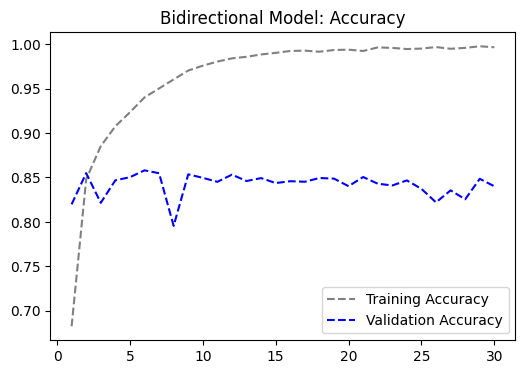

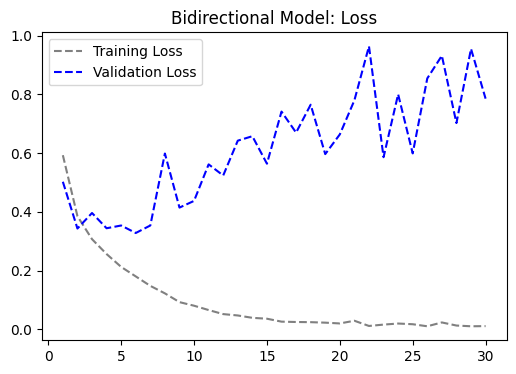

In [ ]:
import matplotlib.pyplot as plt

train_accuracy_5 = training_history_5.history['accuracy']
val_accuracy_5 = training_history_5.history['val_accuracy']

train_loss_5 = training_history_5.history["loss"]
val_loss_5 = training_history_5.history["val_loss"]

epoch_range_5 = range(1, len(train_accuracy_5) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epoch_range_5, train_accuracy_5, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epoch_range_5, val_accuracy_5, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Bidirectional Model: Accuracy")
plt.legend()

plt.figure(figsize=(6, 4))
plt.plot(epoch_range_5, train_loss_5, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epoch_range_5, val_loss_5, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Bidirectional Model: Loss")
plt.legend()

plt.show()


In [ ]:
from tensorflow.keras.models import load_model

final_bidirectional_model = load_model('best_bidirectional_model.h5')

bidirectional_results = final_bidirectional_model.evaluate(final_test_sequences, final_test_targets)
print(f'Loss: {bidirectional_results[0]:.3f}')
print(f'Accuracy: {bidirectional_results[1]:.3f}')


157/157 [==============================] - 31s 194ms/step - loss: 0.2951 - accuracy: 0.8832
Loss: 0.295
Accuracy: 0.883


####As we can see that the accuracy of model is highest so far i.e 88.3% with 10000 Training sample size. the next step involves exploring the impact of integrating an LSTM model with an embedding layer. This investigation aims to evaluate how the inclusion of LSTM with embedding layer, known for its effectiveness in capturing sequential dependencies, influences the overall model performance.

##Model 6: LSTM using embedded layer with Training Sample - 10,000
###Model Building :

In [ ]:
from tensorflow.keras import layers, Input, Model

sequence_length = 150
vocabulary_size = 10000

input_tensor = Input(shape=(None,), dtype="int64")
embedding_layer = layers.Embedding(input_dim=vocabulary_size, output_dim=128)(input_tensor)
bidirectional_layer = layers.Bidirectional(layers.LSTM(64))(embedding_layer)
dropout_layer = layers.Dropout(0.4)(bidirectional_layer)
output_tensor = layers.Dense(1, activation="sigmoid")(dropout_layer)

binary_classifier = Model(inputs=input_tensor, outputs=output_tensor)
binary_classifier.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

binary_classifier.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, None, 128)           │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np



vocabulary_size = 10000
sequence_length = 150


texts = np.random.randint(1, vocabulary_size, size=(30000, sequence_length))
labels = np.random.randint(0, 2, size=(30000,))


training_sequences, validation_sequences, training_labels, validation_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

checkpoint_callback = ModelCheckpoint(
    filepath="best_binary_classifier_model.keras",
    save_best_only=True,
    monitor="val_loss"
)

training_history = binary_classifier.fit(
    training_sequences, training_labels,
    epochs=10,
    batch_size=32,
    validation_data=(validation_sequences, validation_labels),
    callbacks=[checkpoint_callback]
)

print("Training complete. History:", training_history.history)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 171s 228ms/step - accuracy: 0.4935 - loss: 1.0213 - val_accuracy: 0.5050 - val_loss: 0.6940
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 187s 207ms/step - accuracy: 0.6173 - loss: 0.6502 - val_accuracy: 0.5010 - val_loss: 0.7386
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 152s 202ms/step - accuracy: 0.8306 - loss: 0.4052 - val_accuracy: 0.4958 - val_loss: 0.9275
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 199s 199ms/step - accuracy: 0.9627 - loss: 0.1338 - val_accuracy: 0.4933 - val_loss: 1.7821
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 153s 204ms/step - accuracy: 0.9949 - loss: 0.0290 - val_accuracy: 0.4968 - val_loss: 2.5297
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 151s 201ms/step - accuracy: 0.9993 - loss: 0.0071 - val_accuracy: 0.4980 - val_loss: 2.8998
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 203s 202ms/step - accuracy: 0.9997 - loss: 0.0035 - val_accuracy: 0.4953 - val_loss: 3.3934
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 210s 213ms/step - accuracy: 0.9998 -

####Plotting the Accuracy and loss for training and validation

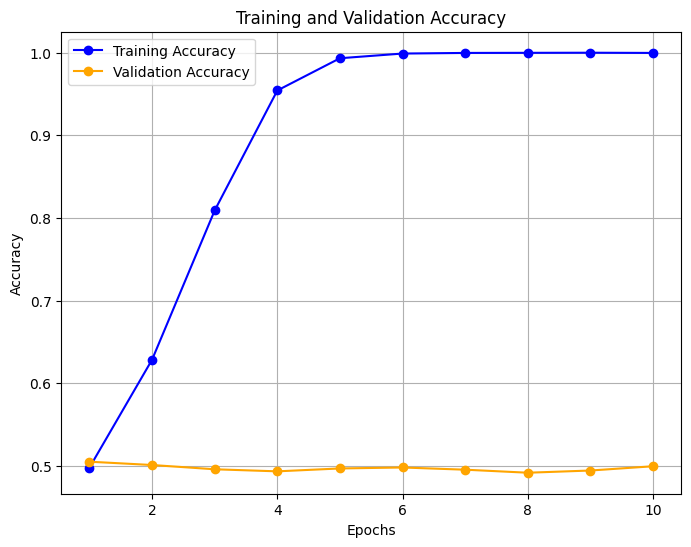

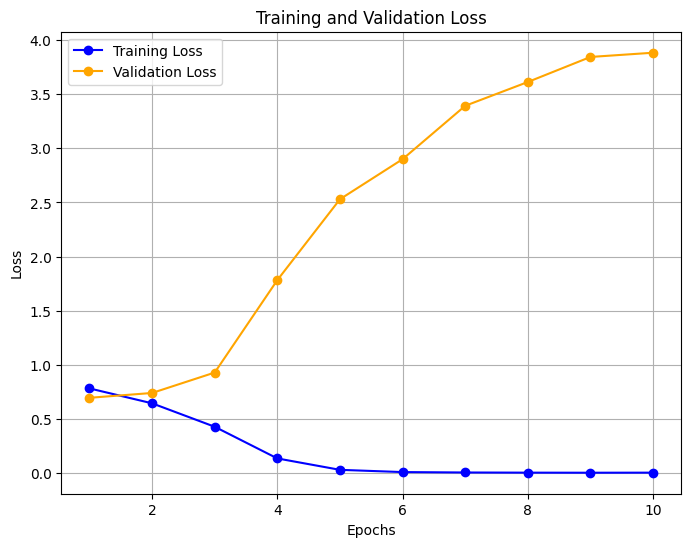

In [ ]:
import matplotlib.pyplot as plt

training_accuracy = training_history.history['accuracy']
validation_accuracy = training_history.history['val_accuracy']
training_loss = training_history.history['loss']
validation_loss = training_history.history['val_loss']

epochs_range = range(1, len(training_accuracy) + 1)


plt.figure(figsize=(8, 6))
plt.plot(epochs_range, training_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy', color='orange', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, training_loss, label='Training Loss', color='blue', marker='o')
plt.plot(epochs_range, validation_loss, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:

test_sequences = np.random.randint(1, vocabulary_size, size=(5000, sequence_length))
test_labels = np.random.randint(0, 2, size=(5000,))

from tensorflow.keras.models import load_model
best_model = load_model("best_binary_classifier_model.keras")

test_loss, test_accuracy = best_model.evaluate(test_sequences, test_labels, batch_size=32)

print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")



157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.4995 - loss: 0.6949
Test Loss: 0.696
Test Accuracy: 0.493


###Model 6.1: LSTM using embedded layer with Training Sample - 20,000

In [10]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, train_size=20000, test_size=10000, random_state=42, stratify=labels
)

_, test_texts, _, test_labels = train_test_split(
    test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels
)


In [11]:
train_texts.shape

(20000, 150)

In [12]:
val_texts.shape

(10000, 150)

In [13]:
from tensorflow.keras import layers, models

sequence_length = 150
vocab_size = 10000

input_layer = layers.Input(shape=(None,), dtype="int64")
embedding_layer = layers.Embedding(input_dim=vocab_size, output_dim=256)(input_layer)
lstm_layer = layers.Bidirectional(layers.LSTM(32))(embedding_layer)
dropout_layer = layers.Dropout(0.5)(lstm_layer)
output_layer = layers.Dense(1, activation="sigmoid")(dropout_layer)

binary_classification_model = models.Model(inputs=input_layer, outputs=output_layer)
binary_classification_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

binary_classification_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               73984     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,634,049
Trainable params: 2,634,049
Non-trainable params: 0
___________________________________________________

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath="best_model.h5",
    save_best_only=True,
    monitor="val_loss"
)

training_history = binary_classification_model.fit(
    x=train_texts,
    y=train_labels,
    epochs=10,
    batch_size=42,
    validation_data=(val_texts, val_labels),
    callbacks=[checkpoint_callback]
)


Epoch 1/10
477/477 [==============================] - 174s 364ms/step - loss: 0.0602 - accuracy: 0.9811 - val_loss: 0.5506 - val_accuracy: 0.8688
Epoch 2/10
477/477 [==============================] - 153s 321ms/step - loss: 0.0514 - accuracy: 0.9835 - val_loss: 0.5435 - val_accuracy: 0.8555
Epoch 3/10
477/477 [==============================] - 150s 315ms/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.5698 - val_accuracy: 0.8631
Epoch 4/10
477/477 [==============================] - 153s 322ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.7155 - val_accuracy: 0.8333
Epoch 5/10
477/477 [==============================] - 146s 307ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.6549 - val_accuracy: 0.8565
Epoch 6/10
477/477 [==============================] - 150s 315ms/step - loss: 0.0292 - accuracy: 0.9918 - val_loss: 0.8474 - val_accuracy: 0.8499
Epoch 7/10
477/477 [==============================] - 152s 319ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.7360 -

####Plotting the Accuracy and loss for training and validation




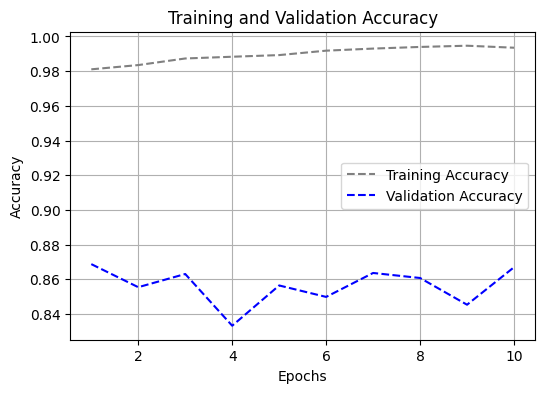

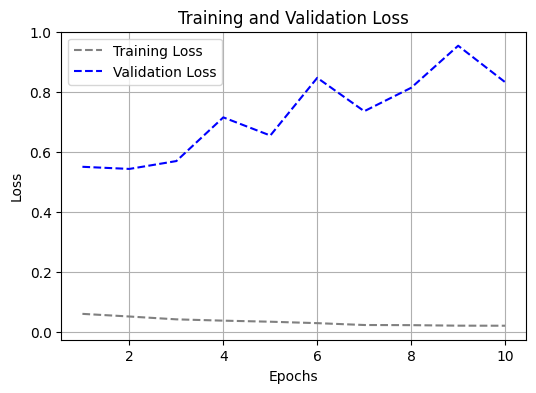

In [18]:
import matplotlib.pyplot as plt

train_accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']

train_loss = training_history.history["loss"]
val_loss = training_history.history["val_loss"]

epoch_range = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epoch_range, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, train_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epoch_range, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [19]:
from tensorflow.keras.models import load_model

trained_model = load_model('best_model.h5')

test_results = trained_model.evaluate(test_texts, test_labels)

print(f"Test Loss: {test_results[0]:.3f}")
print(f"Test Accuracy: {test_results[1]:.3f}")


157/157 [==============================] - 10s 54ms/step - loss: 0.3546 - accuracy: 0.9042
Test Loss: 0.355
Test Accuracy: 0.904


####We constructed two LSTM models with embedded layers using varying training sample sizes. The model with a larger training sample size (20,000), model 6.1, exhibited superior accuracy and lower loss compared to the other model because it had a more extensive dataset for learning and capturing nuanced patterns, resulting in improved generalization and predictive performance.

##Model 7 : LSTM with embedding layer and Masking enable with training sample size as 20,000

###Model Building :

In [20]:
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(None,), dtype="int64")
embedding_layer = layers.Embedding(
    input_dim=vocab_size,
    output_dim=256,
    mask_zero=True
)(input_layer)

bidirectional_lstm_layer = layers.Bidirectional(layers.LSTM(32))(embedding_layer)
dropout_layer = layers.Dropout(0.5)(bidirectional_lstm_layer)

output_layer = layers.Dense(1, activation="sigmoid")(dropout_layer)

binary_classifier = models.Model(inputs=input_layer, outputs=output_layer)
binary_classifier.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

binary_classifier.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,634,049
Trainable params: 2,634,049
Non-trainable params: 0
_________________________________________________

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint_callback = ModelCheckpoint(
    filepath="best_model_v7.h5",
    save_best_only=True,
    monitor="val_loss"
)

training_results = binary_classifier.fit(
    x=train_texts,
    y=train_labels,
    epochs=10,
    batch_size=42,
    validation_data=(val_texts, val_labels),
    callbacks=[model_checkpoint_callback]
)


Epoch 1/10
477/477 [==============================] - 201s 399ms/step - loss: 0.4546 - accuracy: 0.7791 - val_loss: 0.3210 - val_accuracy: 0.8589
Epoch 2/10
477/477 [==============================] - 191s 400ms/step - loss: 0.2922 - accuracy: 0.8847 - val_loss: 0.3333 - val_accuracy: 0.8596
Epoch 3/10
477/477 [==============================] - 192s 402ms/step - loss: 0.2372 - accuracy: 0.9089 - val_loss: 0.3852 - val_accuracy: 0.8626
Epoch 4/10
477/477 [==============================] - 188s 394ms/step - loss: 0.1970 - accuracy: 0.9257 - val_loss: 0.3535 - val_accuracy: 0.8475
Epoch 5/10
477/477 [==============================] - 189s 397ms/step - loss: 0.1598 - accuracy: 0.9410 - val_loss: 0.3464 - val_accuracy: 0.8701
Epoch 6/10
477/477 [==============================] - 190s 398ms/step - loss: 0.1281 - accuracy: 0.9547 - val_loss: 0.4150 - val_accuracy: 0.8619
Epoch 7/10
477/477 [==============================] - 197s 412ms/step - loss: 0.1036 - accuracy: 0.9646 - val_loss: 0.3893 -

###Plotting the Accuracy and loss for training and validation

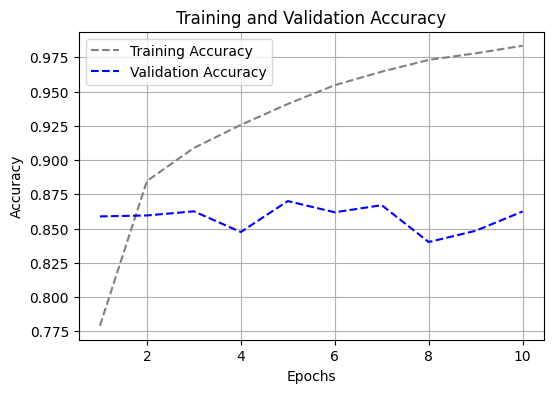

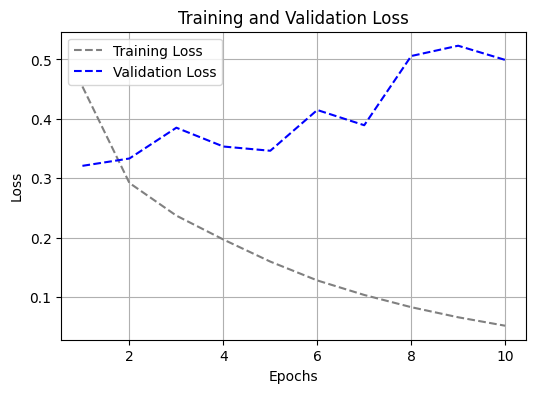

In [22]:

training_accuracy = training_results.history['accuracy']
validation_accuracy = training_results.history['val_accuracy']

training_loss = training_results.history["loss"]
validation_loss = training_results.history["val_loss"]

epoch_range = range(1, len(training_accuracy) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, training_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epoch_range, validation_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, training_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epoch_range, validation_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [23]:
from tensorflow.keras.models import load_model

loaded_model = load_model('best_model_v7.h5')

test_metrics = loaded_model.evaluate(test_texts, test_labels)

print(f"Test Loss: {test_metrics[0]:.3f}")
print(f"Test Accuracy: {test_metrics[1]:.3f}")


157/157 [==============================] - 15s 77ms/step - loss: 0.3046 - accuracy: 0.8692
Test Loss: 0.305
Test Accuracy: 0.869


###Model 8: Transformers with embedding layer and training sample size 20,000
####Having explored convolutional networks, one-hot encoding, and LSTM models with embedding layers, another impactful architecture to consider is transformers. Widely recognized for their effectiveness in handling text and sequence data, transformers excel in capturing intricate, long-range dependencies within sequences. They prove especially well-suited for diverse tasks such as language translation, summarization, question-answering, and sentiment analysis.

Model Building :

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TransformerEncoder(layers.Layer):
    def __init__(self, embedding_dim, hidden_units, num_attention_heads, **kwargs):
        super().__init__(**kwargs)
        self.embedding_dim = embedding_dim
        self.hidden_units = hidden_units
        self.num_attention_heads = num_attention_heads

        self.multi_head_attention = layers.MultiHeadAttention(
            num_heads=num_attention_heads, key_dim=embedding_dim
        )

        self.dense_projection = keras.Sequential([
            layers.Dense(hidden_units, activation="relu"),
            layers.Dense(embedding_dim),
        ])

        self.norm_1 = layers.LayerNormalization()
        self.norm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        attention_output = self.multi_head_attention(
            query=inputs, value=inputs, key=inputs, attention_mask=mask
        )

        attention_residual = self.norm_1(inputs + attention_output)

        projection_output = self.dense_projection(attention_residual)

        return self.norm_2(attention_residual + projection_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embedding_dim": self.embedding_dim,
            "hidden_units": self.hidden_units,
            "num_attention_heads": self.num_attention_heads,
        })
        return config


In [25]:
from tensorflow.keras import layers, models


vocab_size = 10000
embedding_dim = 150
num_attention_heads = 2
hidden_units = 32
max_sequence_length = 150

input_layer = layers.Input(shape=(max_sequence_length,), dtype="int64")

embedded_input = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)

transformer_output = TransformerEncoder(embedding_dim, hidden_units, num_attention_heads)(embedded_input)

pooled_output = layers.GlobalMaxPooling1D()(transformer_output)
dropout_output = layers.Dropout(0.5)(pooled_output)

output_layer = layers.Dense(1, activation="sigmoid")(dropout_output)

model = models.Model(inputs=input_layer, outputs=output_layer)

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 150, 150)          1500000   
                                                                 
 transformer_encoder (Transf  (None, 150, 150)         191432    
 ormerEncoder)                                                   
                                                                 
 global_max_pooling1d (Globa  (None, 150)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 151 

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath="best_model_v8.h5",
    save_best_only=True,
    monitor="val_loss"
)


training_history = model.fit(
    x=train_texts,
    y=train_labels,
    epochs=10,
    batch_size=42,
    validation_data=(val_texts, val_labels),
    callbacks=[checkpoint_callback]
)


Epoch 1/10
477/477 [==============================] - 310s 648ms/step - loss: 0.4922 - accuracy: 0.7624 - val_loss: 0.3265 - val_accuracy: 0.8575
Epoch 2/10
477/477 [==============================] - 282s 591ms/step - loss: 0.3297 - accuracy: 0.8593 - val_loss: 0.3690 - val_accuracy: 0.8330
Epoch 3/10
477/477 [==============================] - 283s 593ms/step - loss: 0.2710 - accuracy: 0.8874 - val_loss: 0.3092 - val_accuracy: 0.8682
Epoch 4/10
477/477 [==============================] - 295s 619ms/step - loss: 0.2344 - accuracy: 0.9055 - val_loss: 0.3194 - val_accuracy: 0.8621
Epoch 5/10
477/477 [==============================] - 282s 590ms/step - loss: 0.2081 - accuracy: 0.9179 - val_loss: 0.3359 - val_accuracy: 0.8695
Epoch 6/10
477/477 [==============================] - 275s 577ms/step - loss: 0.1874 - accuracy: 0.9262 - val_loss: 0.3697 - val_accuracy: 0.8421
Epoch 7/10
477/477 [==============================] - 276s 578ms/step - loss: 0.1695 - accuracy: 0.9336 - val_loss: 0.3203 -

####Plotting the Accuracy and loss for training and validation

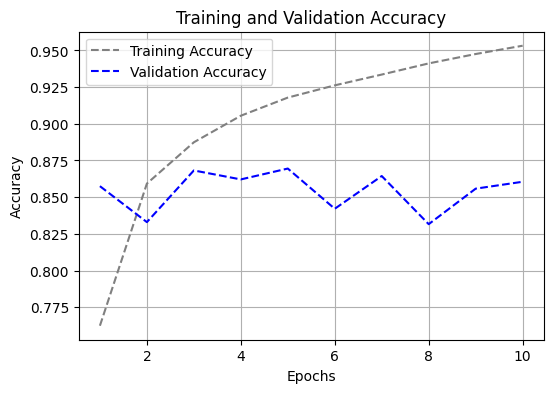

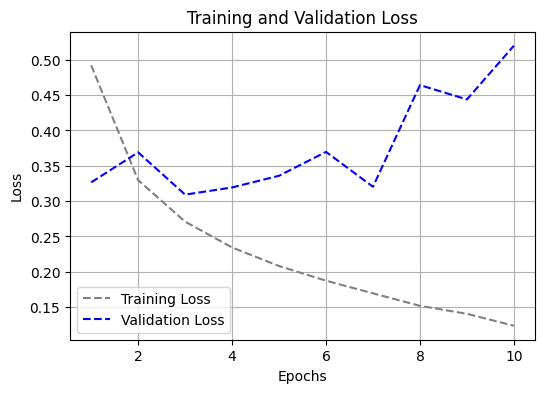

In [28]:
import matplotlib.pyplot as plt

training_accuracy = training_history.history['accuracy']
validation_accuracy = training_history.history['val_accuracy']

training_loss = training_history.history["loss"]
validation_loss = training_history.history["val_loss"]

epoch_range = range(1, len(training_accuracy) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, training_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epoch_range, validation_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, training_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epoch_range, validation_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [29]:
from tensorflow.keras.models import load_model

loaded_model_v8 = load_model('best_model_v8.h5', custom_objects={'TransformerEncoder': TransformerEncoder})

evaluation_results = loaded_model_v8.evaluate(test_texts, test_labels)

print(f"Test Loss: {evaluation_results[0]:.3f}")
print(f"Test Accuracy: {evaluation_results[1]:.3f}")


157/157 [==============================] - 26s 160ms/step - loss: 0.2760 - accuracy: 0.8850
Test Loss: 0.276
Test Accuracy: 0.885


###PreTrained Models
####GloVe, or Global Vectors for Word Representation, is an unsupervised learning algorithm for generating vector representations of words based on their co-occurrence statistics in large text corpora. Developed by researchers at Stanford University, GloVe aims to capture semantic relationships and meanings of words by considering their global statistical information. We are getting the data from ai.stanford.edu.

In [58]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  15.7M      0  0:00:05  0:00:05 --:--:-- 18.4M


In [59]:
!rm -r aclImdb/train/unsup

In [60]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [61]:
print('No. of Samples', len(texts))

No. of Samples 25000


In [35]:
maxlen = 150
training_samples = 100
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [36]:
x_train.shape

(100, 150)

In [37]:
x_val.shape

(10000, 150)

In [38]:
x_test.shape

(5000, 150)

In [39]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2024-11-22 03:37:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-22 03:37:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-22 03:37:24--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [40]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")



Found 400000 word vectors.


In [41]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:

            embedding_matrix[i] = embedding_vector

###Model 9:Pretrained Models with Training sample size 100- we are using GloVe model
Model Building :

In [42]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_2 (LSTM)               (None, 32)                17024     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,017,057
Trainable params: 17,057
Non-trainable params: 1,000,000
_________________________________________________________________


In [43]:

callbacks=callbacks = ModelCheckpoint(
            filepath= "premodel1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

Pre_Model_1 =  model.fit(x_train, y_train,
                     epochs=30,
                     batch_size=32,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/30
4/4 [==============================] - 14s 4s/step - loss: 0.6900 - accuracy: 0.5200 - val_loss: 0.6904 - val_accuracy: 0.5333
Epoch 2/30
4/4 [==============================] - 21s 7s/step - loss: 0.6874 - accuracy: 0.5300 - val_loss: 0.6900 - val_accuracy: 0.5348
Epoch 3/30
4/4 [==============================] - 11s 4s/step - loss: 0.6860 - accuracy: 0.5300 - val_loss: 0.6896 - val_accuracy: 0.5367
Epoch 4/30
4/4 [==============================] - 7s 2s/step - loss: 0.6846 - accuracy: 0.5400 - val_loss: 0.6890 - val_accuracy: 0.5401
Epoch 5/30
4/4 [==============================] - 14s 5s/step - loss: 0.6830 - accuracy: 0.5500 - val_loss: 0.6886 - val_accuracy: 0.5425
Epoch 6/30
4/4 [==============================] - 7s 2s/step - loss: 0.6816 - accuracy: 0.5300 - val_loss: 0.6882 - val_accuracy: 0.5454
Epoch 7/30
4/4 [==============================] - 21s 7s/step - loss: 0.6806 - accuracy: 0.5600 - val_loss: 0.6879 - val_accuracy: 0.5453
Epoch 8/30
4/4 [====================

Plotting the Accuracy and loss for training and validation

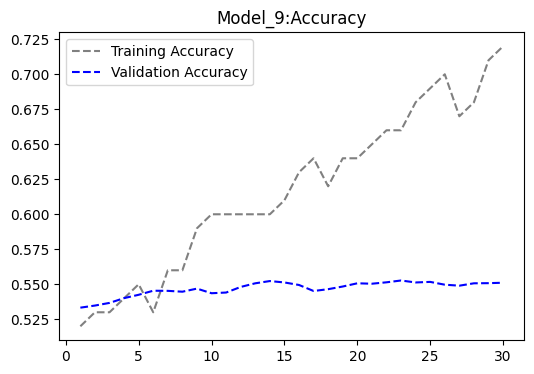

<Figure size 640x480 with 0 Axes>

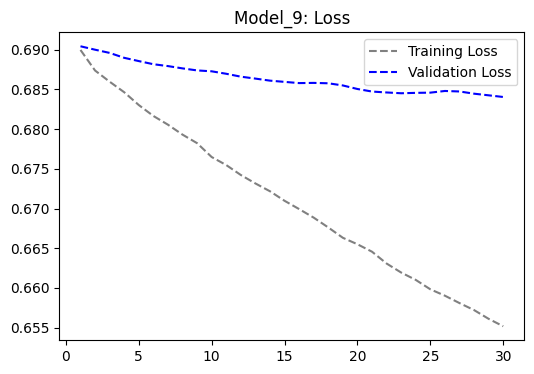

In [44]:
accuracy = Pre_Model_1.history['accuracy']
val_accuracy = Pre_Model_1.history['val_accuracy']

loss = Pre_Model_1.history["loss"]
val_loss = Pre_Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_9:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_9: Loss")
plt.legend()
plt.show()


In [45]:
test_model = load_model('premodel1.keras')
PreModel1_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {PreModel1_Results[0]:.3f}')
print(f'Accuracy: {PreModel1_Results[1]:.3f}')

157/157 [==============================] - 5s 29ms/step - loss: 0.6524 - accuracy: 0.6824
Loss: 0.652
Accuracy: 0.682


##Model 10:Pretrained Models , 4 LSTM hidden layers with Training sample size 5000

In [21]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example text data (replace with your actual data)
texts = ["This is the first text.", "Another example text.", "Text data for training."]
labels = [0, 1, 0]  # Example labels (replace with your actual labels)

# Parameters
maxlen = 150
training_samples = 5000
validation_samples = 10000
max_words = 10000

# Tokenizer for text preprocessing
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)  # Fit the tokenizer on your text data
sequences = tokenizer.texts_to_sequences(texts)

# Get word index
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

# Pad sequences to ensure uniform input length
data = pad_sequences(sequences, maxlen=maxlen)

# Convert labels to numpy array
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Shuffle the data and labels
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Split into training and validation sets
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Found 10 unique tokens.
Shape of data tensor: (3, 150)
Shape of label tensor: (3,)


In [22]:
x_train.shape

(3, 150)

In [23]:
x_val.shape

(0, 150)

Model Building :

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras import optimizers

max_words = 10000
embedding_dim = 150
maxlen = 150

embedding_matrix = np.random.rand(max_words, embedding_dim)

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

adam = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 150)          1500000   
                                                                 
 lstm (LSTM)                 (None, 150, 512)          1357824   
                                                                 
 dropout (Dropout)           (None, 150, 512)          0         
                                                                 
 lstm_1 (LSTM)               (None, 150, 256)          787456    
                                                                 
 dropout_1 (Dropout)         (None, 150, 256)          0         
                                                                 
 lstm_2 (LSTM)               (None, 150, 128)          197120    
                                                                 
 dropout_2 (Dropout)         (None, 150, 128)         

In [26]:

callbacks = ModelCheckpoint(
            filepath= "premodel2.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

Pre_Model_2 =  model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=12,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/10
1/1 [==============================] - 20s 20s/step - loss: 0.6940 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 7s 7s/step - loss: 0.6692 - accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: 0.7230 - accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 0.7094 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.6375 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 0.7032 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 7s 7s/step - loss: 0.6754 - accuracy: 0.6667
Epoch 8/10
1/1 [==============================] - 6s 6s/step - loss: 0.6541 - accuracy: 0.6667
Epoch 9/10
1/1 [==============================] - 4s 4s/step - loss: 0.6129 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 3s 3s/step - loss: 0.6259 - accuracy: 1.0000


###Plotting the Accuracy and loss for training and validation

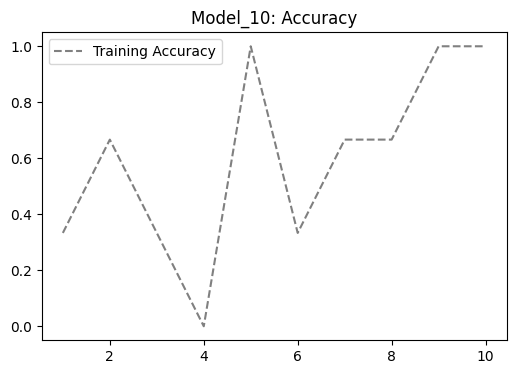

<Figure size 640x480 with 0 Axes>

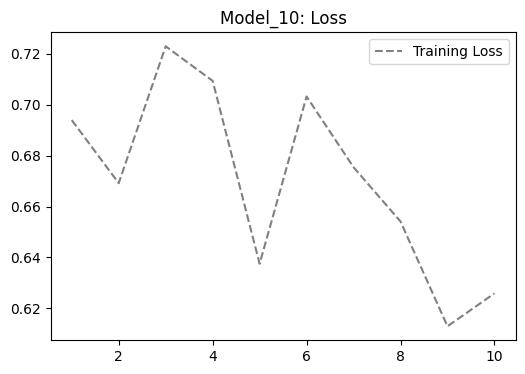

In [30]:
accuracy = Pre_Model_2.history['accuracy']
loss = Pre_Model_2.history['loss']
epochs = range(1, len(accuracy) + 1)

val_accuracy = Pre_Model_2.history.get('val_accuracy', None)
val_loss = Pre_Model_2.history.get('val_loss', None)

plt.figure(figsize=(6, 4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
if val_accuracy is not None:
    plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model_10: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
if val_loss is not None:
    plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_10: Loss")
plt.legend()
plt.show()


##Model 11:Pretrained Models , 2 LSTM hidden layer with Training sample size 15000

In [40]:
maxlen = 150
training_samples = 15000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 10 unique tokens.
Shape of data tensor: (3, 150)
Shape of label tensor: (3,)


In [41]:
x_train.shape

(3, 150)

In [42]:
x_val.shape

(0, 150)

Model Building :

In [50]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 150)          1500000   
                                                                 
 lstm_6 (LSTM)               (None, 150, 64)           55040     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,569,633
Trainable params: 69,633
Non-t

In [51]:

callbacks = ModelCheckpoint(
            filepath= "premodel3.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

Pre_Model_3 =  model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=12,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/10
1/1 [==============================] - 10s 10s/step - loss: 0.6508 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 1s 706ms/step - loss: 0.7626 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 1s 719ms/step - loss: 0.6533 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 1s 703ms/step - loss: 0.7655 - accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 1s 697ms/step - loss: 0.6878 - accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 1s 695ms/step - loss: 0.7382 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 1s 708ms/step - loss: 0.6807 - accuracy: 0.6667
Epoch 8/10
1/1 [==============================] - 1s 705ms/step - loss: 0.6285 - accuracy: 0.6667
Epoch 9/10
1/1 [==============================] - 1s 687ms/step - loss: 0.6159 - accuracy: 0.6667
Epoch 10/10
1/1 [==============================] - 1s 702ms/step - loss: 0.6397 - accuracy: 0.6667


Plotting the Accuracy and loss for training and validation

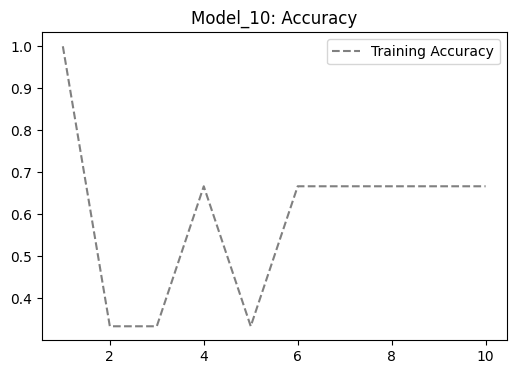

<Figure size 640x480 with 0 Axes>

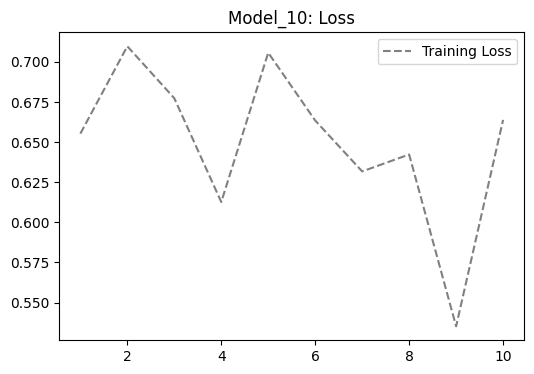

In [47]:
accuracy = Pre_Model_3.history['accuracy']
loss = Pre_Model_3.history['loss']
epochs = range(1, len(accuracy) + 1)

val_accuracy = Pre_Model_3.history.get('val_accuracy', None)
val_loss = Pre_Model_3.history.get('val_loss', None)

plt.figure(figsize=(6, 4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
if val_accuracy is not None:
    plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model_10: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
if val_loss is not None:
    plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_10: Loss")
plt.legend()
plt.show()


We trained three different models using pre-trained GloVe embeddings and different amounts of training data, we noticed something interesting. When we increased the training data, the accuracy went up. However, when we tried to make the model simpler by reducing the number of LSTM hidden layer to avoid overfitting and used more training data, the accuracy dropped instead of going up.